Business Oriented Descriptive Statistics
===

Foreword:
---

To be written :3

Imports:
---

Below are the basic imports which we are going to use, please make note that in order for the charts to show up in the notebook we need to type the following line at the very beginning **"%matplotlib inline"**

In [1]:
%matplotlib inline
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
from io import StringIO

# Benchmarking
from time import time

Load Data:
---

We will use the **requests** library to fetch the data from Yahoo Fiance. The only thing we need is the URL which gets us the data we require, in this case the daily historical data for GE for the period between 01/04/2016 and 06/22/2016. Once we have the raw data we can get its text property and pass it to the **StringIO** method and fake the behavior of an actual csv file which is required by the **read_csv method** from the pandas library.

In [2]:
ex1_raw_data = requests.get('http://chart.finance.yahoo.com/table.csv?s=GE&a=0&b=4&c=2016&d=6&e=22&f=2016&g=d&ignore=.csv')
ex1_data = pd.read_csv(StringIO(ex1_raw_data.text),
                      sep=',',
                      encoding='latin1',
                      parse_dates=['Date'],
                      dayfirst=True,
                      index_col='Date').sort_index()

Average:
---

The **average** or **sample mean** (when the data comes from a sample) is the summation of the array's values divided by the number of observations (the size of the sample **n**)

$$\bar{X} = \frac{\sum_{i=1}^n X_i}n$$

First we have to get the value for **n**. We will use the built in function **len()** in comination with the DataFrame's index attribute passed as a parameter. For the sum of the values we will use the built-in **sum()** method or we could go all-out fancy mode and use a lambda function passed as a parameter to the reduce function which we **need to import from the functools package**.

In [3]:
start = time()
n = len(ex1_data.index)
#acum = sum(ex1_data['Adj Close'])
acum = reduce(lambda x, y: x + y, ex1_data['Adj Close'])
avg = acum/n
total = time() - start

print('Mean without Numpy:', avg, 'in', total, 'seconds.')

Mean without Numpy: 29.5182273143 in 0.0006916522979736328 seconds.


Thankfully Numpy comes with an implementation of the **mean** function which can also work with multidimensional arrays (matrices)

In [4]:
start = time()
avg = np.mean(ex1_data['Adj Close'])
print('Mean with Numpy:', avg, 'in', total, 'seconds.')
total = time() - start

Mean with Numpy: 29.5182273143 in 0.0006916522979736328 seconds.


Median:
---

If we sort our data in an ascending or descending order, the record which takes the center of the distribution is called the **median**. If our set contains an odd number of items we only have **one item that represents the median** and we can just pick it out from our list, however if our dataset has an even number of observations then we have to take the two items that split the set in an equal amount of items both left and righ, those numbers being $X_{n/2}$ and $X_{n/2+1}$ and **perform the mean with those 2 observations**.
Here is one gotcha though. In Python and many other languages the arrays are zero indexed and that means the first item starts at the position zero. If we try to get the $X_{n/2}$ item in Python we will fetch the element placed after the one in the middle and that is wrong. $X_{(n-1)/2}$ is the way to go.
Gotcha number 2! Python slices do not include the last item in the selection. This means if you select items [1:3] you are actually getting items 1 and 2. We can represent this as an interval with an inclusive beginning and an exclusive ending $[1,3)$

In [5]:
start = time()
# Check parity 
x, y = int(n/2 + (n % 2 - 1)), int(n/2 - (n % 2 - 1))
if x == y:
    total = time() - start
    print('Median without Numpy:', np.mean(sorted(ex1_data['Adj Close'])[x]), 'in', total, 'seconds')
else:
    total = time() - start
    print('Median without Numpy:', np.mean(sorted(ex1_data['Adj Close'])[x:y]), 'in', total, 'seconds')


Median without Numpy: 29.5431 in 0.000194549560546875 seconds


Once again Numpy provides a method for making the whole thing a lot **less verbose**.

In [6]:
start = time()
median = np.median(ex1_data['Adj Close'])
total = time() - start

print('Median with Numpy:', median, 'in', total, 'seconds')

Median with Numpy: 29.5431 in 0.0004284381866455078 seconds


Outliers:
---

If we plot a **histogram** of our data, we can see that it has a pretty **normal distribution** (more on this later). This characteristic wil make the Average and the Median to be pretty similar. However if one of the elements in the data has an extremely high or low value it will make the Average and the Mean to grow considerably distand from each other.

Mean: 29.5182273143 Median: 29.5431


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f809ae3b6d8>]], dtype=object)

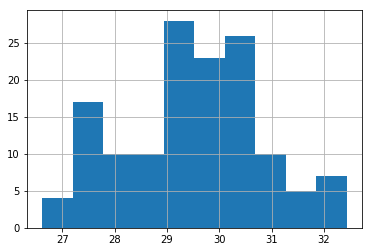

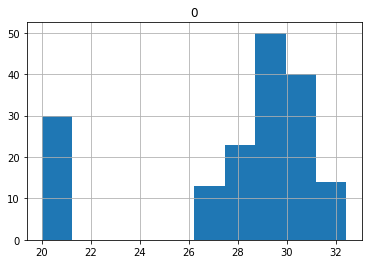

In [7]:
print('Mean:', avg, 'Median:', median)
ex1_data['Adj Close'].hist()
# Overwriting the variables with tests
test_arr = ex1_data['Adj Close']
test_arr = test_arr.append(pd.DataFrame([20 for i in range(30)]))
test_arr.hist()